In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def mov1 (x,t):
    x, dx = x
    return (dx, -G*M*m/x**2)

In [12]:
G=1.0
M=1.0
m=1.0

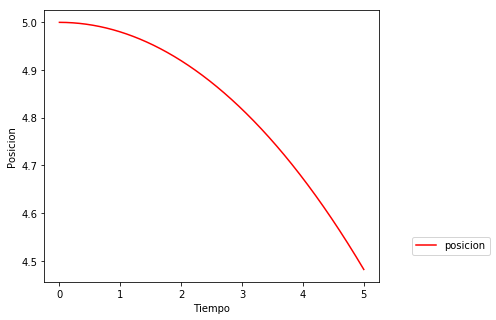

In [10]:
x0= (5.0, 0)

t = np.linspace(0, 5, 1000)

xx = odeint(mov1, x0, t)

plt.figure(figsize=(6,5))

plt.plot(t, xx[:,0] , 'r', label='posicion')
plt.legend(loc=(1.1, 0.1))
plt.xlabel('Tiempo')
plt.ylabel('Posicion')
plt.show()
    

In [13]:
def mov1 (x,t):
    x, dx, y, dy = x
    return (dx, -G*M*m*x/(y**2+x**2)**(3/2), dy, -G*M*m*y/(y**2+x**2)**(3/2))

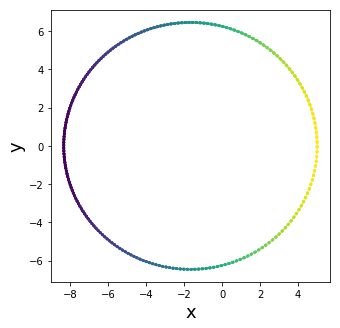

In [24]:
x0= (5, 0, 0, 0.5)

t = np.linspace(0, 500, 1000)

xx = odeint(mov1, x0, t)

plt.figure(figsize=(6,5))

plt.figure(figsize = (5, 5))
plt.scatter(xx[:,0], xx[:,2], c= xx[:,0] , s = 8, lw = 0)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.show()